# IMPORTING PYTHON LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
df=pd.read_csv("data_2_var.csv")

In [5]:
df.head()

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


In [6]:
df.value_counts()

-122.7406674  -130.5720846
-125.366669    131.000000     9
 3.633331     -95.000000      2
-131.366669   -125.000000     2
 2.633331     -95.000000      2
 112.633331    103.000000     2
                             ..
-23.366669    -66.000000      1
              -59.000000      1
-22.749255    -39.747836      1
-22.713850    -79.090374      1
 134.605775    123.619680     1
Length: 1089, dtype: int64

In [7]:
df["-122.7406674"]

0      -121.531419
1      -134.917019
2      -120.605951
3      -129.894781
4      -134.366669
           ...    
1105   -115.366669
1106   -119.954237
1107   -109.942155
1108   -111.515368
1109   -110.344221
Name: -122.7406674, Length: 1110, dtype: float64

In [8]:
df['-130.5720846']

0      -129.938929
1      -130.141832
2      -125.760932
3      -112.785214
4      -116.000000
           ...    
1105    121.000000
1106    123.609122
1107    127.197394
1108    128.170885
1109    123.087950
Name: -130.5720846, Length: 1110, dtype: float64

In [9]:
df1=df.rename(columns={'-122.7406674':'A','-130.5720846':'B'})

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1110 non-null   float64
 1   B       1110 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [11]:
df1["A"]=df1['A'].astype(float)
df1['B']=df1["B"].astype(float)
print(df1,df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1110 non-null   float64
 1   B       1110 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB
               A           B
0    -121.531419 -129.938929
1    -134.917019 -130.141832
2    -120.605951 -125.760932
3    -129.894781 -112.785214
4    -134.366669 -116.000000
...          ...         ...
1105 -115.366669  121.000000
1106 -119.954237  123.609122
1107 -109.942155  127.197394
1108 -111.515368  128.170885
1109 -110.344221  123.087950

[1110 rows x 2 columns] None


In [12]:
df1.isna().sum()

A    0
B    0
dtype: int64

In [13]:
df1.describe()

,A,B
count,1110.000000,1110.000000
mean,6.899714,-26.093318
std,79.324069,69.755980
min,-134.962839,-132.422167
25%,-53.366669,-76.994298
50%,15.739103,-46.036319
75%,76.193907,7.598960
max,134.605775,134.425495


# while i was comparing meam=6.899714, median=15.739103, this dataset  contains outliers

<AxesSubplot:xlabel='A', ylabel='B'>

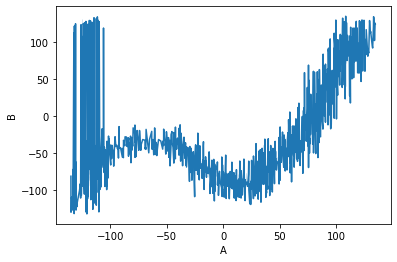

In [14]:
sns.lineplot(x=df1['A'],y=df1['B'])

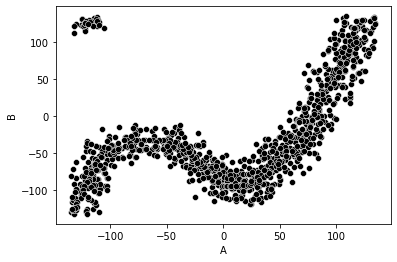

In [15]:
sns.scatterplot(x=df1['A'],y=df1['B'],data=df1,color='k')
plt.show()

# Removing outliers

In [16]:
outlier=df1[(df1['A']<-100) & (df1['B']>100)].index

In [17]:
df1=df1.loc[~df1.index.isin(outlier)]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A', ylabel='B'>

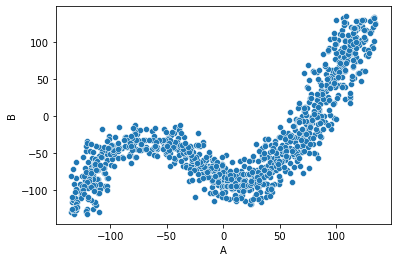

In [18]:
sns.scatterplot(df1['A'],df1['B'])

In [19]:
X=df1[['A']]
Y=df1[['B']]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split( X ,Y,train_size = 0.70,random_state = 100)

In [22]:
print(X_train.head(5))
print(X_test.head(5))
print(Y_train.head(5))
print(Y_test.head(5))

              A
620   38.334072
770  -85.366669
750  -65.366669
454  103.303087
569   76.440487
              A
786 -101.366669
124  -66.008886
886   30.907386
146  -43.800264
583   62.252799
              B
620 -102.626506
770  -32.000000
750  -32.000000
454   87.081076
569  -30.400176
              B
786  -43.000000
124  -49.966371
886 -112.488908
146  -63.795594
583  -44.907447


In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [24]:
Y_train_pred = regressor.predict(X_train)

In [25]:
from sklearn import metrics

In [26]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(X_train,Y_train_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(X_train, Y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(X_train,Y_train_pred)))
print('r2 score for train: ',metrics.r2_score(X_train,Y_train_pred))


Mean Absolute Error:  45.74071827490491
Mean Squared Error:  2868.664366992106
Root Mean Squared Error:  53.559913806802435
r2 score for train:  0.5277637586642536


In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_test, Y_test)

LinearRegression()

In [28]:
Y_test_pred = regressor.predict(X_test)

In [29]:
from sklearn import metrics

In [30]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(X_test,Y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(X_test, Y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(X_test,Y_test_pred)))
print('r2 score for test: ', metrics.r2_score(X_test, Y_test_pred))

Mean Absolute Error:  49.25401298398867
Mean Squared Error:  3241.0692412821413
Root Mean Squared Error:  56.93038943553909
r2 score for test:  0.4094483279783998


# the model r2 score is very less.so underfit

# linear regression after feature engineer

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(df1[['A']])
X_poly


array([[ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04,
        -1.79500520e+06],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04,
        -2.45584080e+06],
       [ 1.00000000e+00, -1.20605951e+02,  1.45457954e+04,
        -1.75430949e+06],
       ...,
       [ 1.00000000e+00,  1.15862302e+02,  1.34240731e+04,
         1.55534401e+06],
       [ 1.00000000e+00,  1.17366199e+02,  1.37748247e+04,
         1.61669883e+06],
       [ 1.00000000e+00,  9.96831410e+01,  9.93672860e+03,
         9.90524318e+05]])

In [32]:
transformed_df1 = pd.DataFrame(X_poly, columns=['A_0', 'A_1', 'A_2','A_3'])
transformed_df1['B'] = df1['B']
transformed_df1.head()

,A_0,A_1,A_2,A_3,B
0,1.0,-121.531419,14769.885901,-1.795005e+06,-129.938929
1,1.0,-134.917019,18202.602016,-2.455841e+06,-130.141832
2,1.0,-120.605951,14545.795441,-1.754309e+06,-125.760932
3,1.0,-129.894781,16872.654053,-2.191670e+06,-112.785214
4,1.0,-134.366669,18054.401658,-2.425910e+06,-116.000000


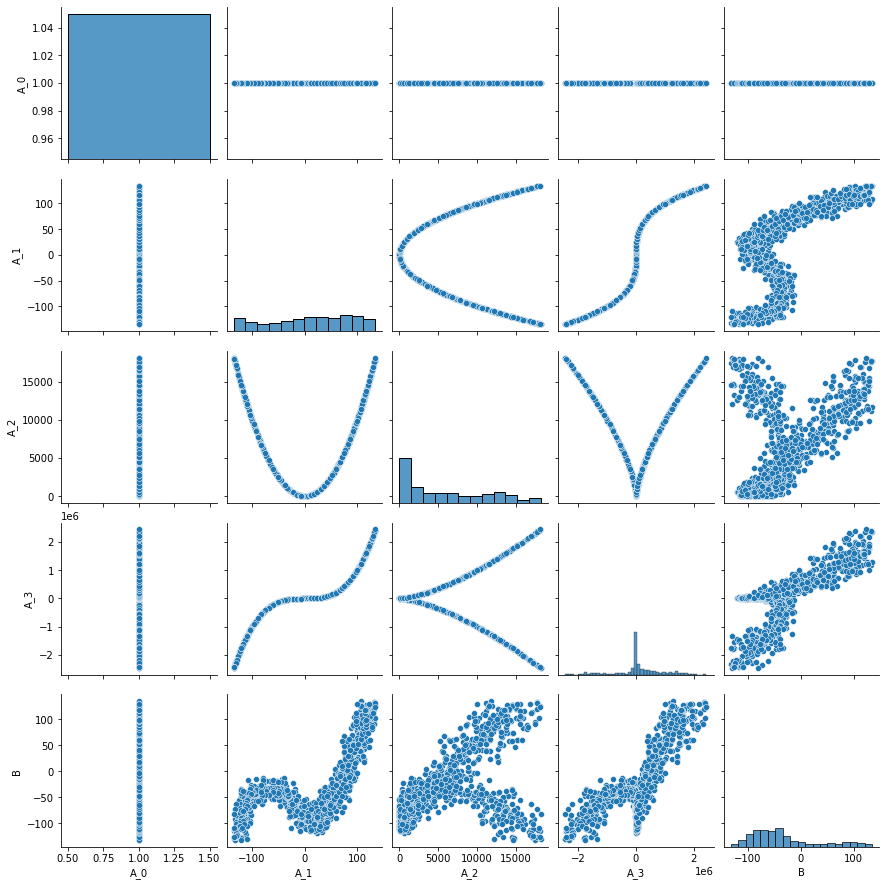

In [33]:
sns.pairplot(transformed_df1)

In [34]:
reg_poly = LinearRegression()
reg_poly.fit(transformed_df1[['A_3']], transformed_df1['B'])
print(reg_poly.coef_, reg_poly.intercept_)

[5.34341306e-05] -34.86046572001899


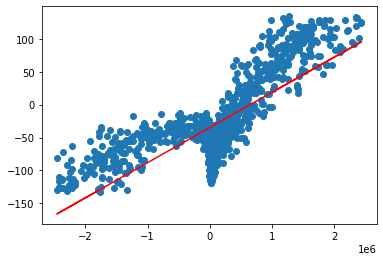

In [35]:
pred_poly = reg_poly.predict(transformed_df1[['A_3']])
plt.scatter(transformed_df1['A_3'], df1['B'])

plt.plot(transformed_df1['A_3'], pred_poly, 'r')

plt.show()

In [36]:
transformed_df1 = pd.DataFrame(X_poly, columns=['A_0', 'A_1', 'A_2','A_3'])
transformed_df1['B'] = df1['B']
transformed_df1.head()

,A_0,A_1,A_2,A_3,B
0,1.0,-121.531419,14769.885901,-1.795005e+06,-129.938929
1,1.0,-134.917019,18202.602016,-2.455841e+06,-130.141832
2,1.0,-120.605951,14545.795441,-1.754309e+06,-125.760932
3,1.0,-129.894781,16872.654053,-2.191670e+06,-112.785214
4,1.0,-134.366669,18054.401658,-2.425910e+06,-116.000000


In [37]:
X=transformed_df1[['A_0', 'A_1', 'A_2','A_3']]

y=transformed_df1['B'] 

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=100)

In [39]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)
y_tr_pred = regressor.predict(x_train)
from sklearn import metrics
print('Root Mean Squared Error for train: ', np.sqrt(metrics.mean_squared_error(y_train, y_tr_pred)))
print('r2 score for train: ',metrics.r2_score(y_train, y_tr_pred))
y_test_pred = regressor.predict(x_test)
print('Root Mean Squared Error for test: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('r2 score for test: ', metrics.r2_score(y_test, y_test_pred))

Root Mean Squared Error for train:  26.78392222468455
r2 score for train:  0.8370224986218595
Root Mean Squared Error for test:  22.474556402749755
r2 score for test:  0.8534090307803782


# after feature engineer the linear regression model is good fit with 0.84 r2_score for test

# decision tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_tr_pred = regressor.predict(x_train)
from sklearn import metrics
print('Root Mean Squared Error for train: ', np.sqrt(metrics.mean_squared_error(y_train, y_tr_pred)))
print('r2 score for train: ',metrics.r2_score(y_train, y_tr_pred))
y_test_pred = regressor.predict(x_test)
print('Root Mean Squared Error for test: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('r2 score for test: ', metrics.r2_score(y_test, y_test_pred))

Root Mean Squared Error for train:  1.8115330904558495
r2 score for train:  0.9992544584574748
Root Mean Squared Error for test:  27.36106595232419
r2 score for test:  0.7827343920276463


# Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
tuned_parameters = [{'max_depth':[i for i in range(1,100)]}]

clf = GridSearchCV(
    estimator=DecisionTreeRegressor(), 
    param_grid=tuned_parameters, 
    scoring='neg_root_mean_squared_error',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(x_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [42]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

Best parameters set found on train set
{'max_depth': 5}
DecisionTreeRegressor(max_depth=5)



In [43]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002263,0.000825,0.001571,0.000776,1,{'max_depth': 1},-34.765528,-40.694267,-34.684153,-35.074573,...,-35.865333,2.434599,99,-35.093721,-34.019748,-35.118354,-35.121085,-35.380858,-34.946753,0.475231
1,0.001594,0.000488,0.000926,0.000526,2,{'max_depth': 2},-31.237708,-32.921898,-30.372890,-28.260988,...,-29.906980,2.182096,8,-28.393758,-27.426577,-28.086591,-28.630657,-28.805261,-28.268569,0.485157
2,0.000997,0.001261,0.003344,0.006156,3,{'max_depth': 3},-29.173553,-29.723639,-28.557766,-26.520719,...,-27.992965,1.475860,5,-25.232738,-24.810834,-25.733781,-26.310939,-26.391318,-25.695922,0.610111
3,0.000000,0.000000,0.004532,0.006184,4,{'max_depth': 4},-27.426086,-25.643702,-26.760060,-24.479063,...,-25.734598,1.214550,3,-22.090060,-21.729373,-21.706315,-23.111833,-23.622515,-22.452019,0.776495
4,0.000000,0.000000,0.000000,0.000000,5,{'max_depth': 5},-27.477692,-25.322280,-27.843265,-23.693447,...,-25.299331,2.174940,1,-19.452175,-19.486020,-19.222731,-21.008635,-20.725566,-19.979026,0.736210


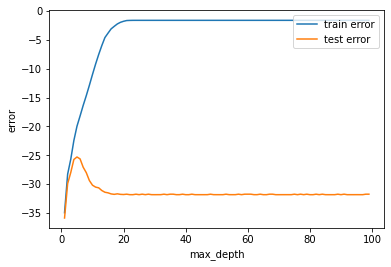

In [44]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend(['train error', 'test error'], loc='upper right')

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(max_depth=5)
regressor.fit(x_train, y_train)
y_tr_pred = regressor.predict(x_train)
from sklearn import metrics
print('Root Mean Squared Error for train: ', np.sqrt(metrics.mean_squared_error(y_train, y_tr_pred)))
print('r2 score for train: ',metrics.r2_score(y_train, y_tr_pred))
y_test_pred = regressor.predict(x_test)
from sklearn import metrics
print('Root Mean Squared Error for test: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('r2 score for test: ', metrics.r2_score(y_test, y_test_pred))

Root Mean Squared Error for train:  20.409137911916737
r2 score for train:  0.9053700467259599
Root Mean Squared Error for test:  22.6494793452417
r2 score for test:  0.8511182703737057


# after feature engineer the decision tree regression model is good fit with 0.83 r2_score for test